In [156]:
## We separate imports from the rest of the code
# -*- coding: utf-8 -*-
import numpy as np
import math
import matplotlib.pyplot as plt
import torch 

In [10]:
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

len(x), len(y)

(2000, 2000)

In [5]:
## This is just an example copied from PyTorch documentation
# Create random input and output data

x = np.linspace(-math.pi, math.pi, 2000)
f = np.sin
y = f(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 2142.2211909797934
199 1421.3198178966854
299 944.1012459669822
399 628.1701152801905
499 418.99858730799116
599 280.49846892930816
699 188.7840395605378
799 128.04501388029644
899 87.8156231711183
999 61.167440119441615
1099 43.51342524442036
1199 31.81642402536576
1299 24.065305461976
1399 18.9282189262369
1499 15.52306982849668
1599 13.26557652100777
1699 11.768677537469534
1799 10.775929440949644
1899 10.117405868814672
1999 9.680493119029206
Result: y = 0.007780417767298871 + 0.8290867822987933 x + -0.0013422515315695345 x^2 + -0.0893968397090363 x^3


In [13]:
# Generates an array of 2 dimensional arrays
np.random.uniform(low=0, high=100000, size=(1000, 2)).astype(int)[0:3]

array([[34176, 28990],
       [77762, 78742],
       [68266,  9714]])

In [188]:
TOTAL_DATA_POINTS = 3

# customer = [loan_amount, salary] if salary > loan_amount then the user defaults
customer_profiles = np.random.uniform(low=0, high=100000, size=(TOTAL_DATA_POINTS, 2)).astype(int)
# 0 = user will pay back, 1 = user will default
def real_f(loan_amount, salary):
   return 0 if salary > loan_amount else 1

# Calculate if the user will default or not
customer_defaults = [real_f(loan_amount, salary) for loan_amount, salary in customer_profiles]

x = torch.tensor(customer_profiles).type(torch.FloatTensor)
y = torch.tensor(customer_defaults).type(torch.FloatTensor)

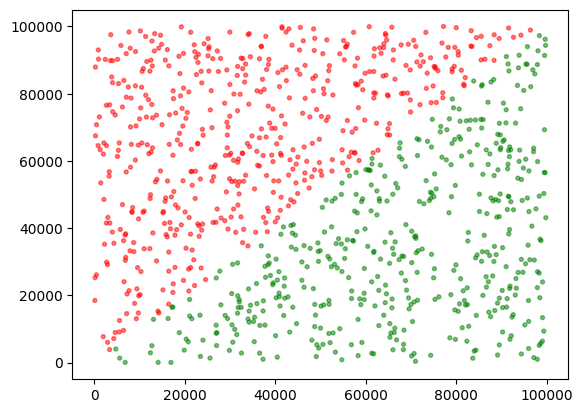

In [118]:
# Actually plot the dots in the graph

# Salary
x_axis = [x[1] for x in customer_profiles]
# Loan Amount
y_axis = [x[0] for x in customer_profiles]

# The color of the dot  (red = defaults, green = pays back)
colors = ['red' if y == 1 else 'green' for y in customer_defaults]

# for i in range(10):
#     print("Salary: ", x_axis[i], " Loan: ",y_axis[i], " Defaulted: ", colors[i])

plt.scatter(x_axis,y_axis,color=colors, alpha=0.5, s=8)
plt.show()

In [135]:
np.random.uniform(low=0, high=0.01, size=(2,))


array([0.004537 , 0.0057619])

In [151]:
# test = np.array([-3,-2,-1,0,1,2,3])
# (test >= 0) * 1

np.random.uniform(low=0, high=0.01, size=(2,)).T

array([0.00566194, 0.0033899 ])

In [187]:
# Let's try some ML? :thinking:



learning_rate=1e-4 # 0.0001


a = torch.rand((1,2)).T
b = torch.rand(1).type(torch.FloatTensor)

# [x1, x2, x2]
# [out1, out2, out2]
print(x, y)
for run in range(TOTAL_DATA_POINTS):
    # salary * a + loan_amount * b > c

    y_pred =  ((x @ a + b) > 0 ) * 1
    # y_predicted = (x_axis[run] * b + y_axis[run] * b)
    print(x @ a)
    print(y_pred, y)
    loss = torch.abs(y_pred - y).sum()
    print(loss)

    # if run % 100 == 99:
    #     print(run, loss)

    # grad_y_pred = 2.0 * (y_predicted - customer_defaults[run])
    # grad_a = grad_y_pred.sum()
    # grad_b = (grad_y_pred * x_axis[run]).sum()

    # a -= learning_rate * grad_a
    # b -= learning_rate * grad_b


torch.Size([2, 1]) torch.Size([1, 2])
tensor([[1]])
tensor([[1]]) tensor([0.])
tensor(1.)
